In [ ]:
import pandas as pd
import numpy as np


**1.Data Cleaning and Preparation**


In [ ]:
df=pd.read_csv("/content/Cardiotocographic.csv")



*   Loading the data into the Data frame.



In [ ]:
df.head()

LB        AC   FM        UC        DL   DS   DP  ASTV  MSTV  ALTV  \
0  120.000000  0.000000  0.0  0.000000  0.000000  0.0  0.0  73.0   0.5  43.0   
1  132.000000  0.006380  0.0  0.006380  0.003190  0.0  0.0  17.0   2.1   0.0   
2  133.000000  0.003322  0.0  0.008306  0.003322  0.0  0.0  16.0   2.1   0.0   
3  134.000000  0.002561  0.0  0.007742  0.002561  0.0  0.0  16.0   2.4   0.0   
4  131.948232  0.006515  0.0  0.008143  0.000000  0.0  0.0  16.0   2.4   0.0   

   MLTV  Width  Tendency  NSP  
0   2.4   64.0  0.999926  2.0  
1  10.4  130.0  0.000000  1.0  
2  13.4  130.0  0.000000  1.0  
3  23.0  117.0  1.000000  1.0  
4  19.9  117.0  1.000000  1.0

Displaying the first five rows present in the csv file




*  Handle missing values



In [ ]:
df.isnull()

LB     AC     FM     UC     DL     DS     DP   ASTV   MSTV   ALTV  \
0     False  False  False  False  False  False  False  False  False  False   
1     False  False  False  False  False  False  False  False  False  False   
2     False  False  False  False  False  False  False  False  False  False   
3     False  False  False  False  False  False  False  False  False  False   
4     False  False  False  False  False  False  False  False  False  False   
...     ...    ...    ...    ...    ...    ...    ...    ...    ...    ...   
2121  False  False  False  False  False  False  False  False  False  False   
2122  False  False  False  False  False  False  False  False  False  False   
2123  False  False  False  False  False  False  False  False  False  False   
2124  False  False  False  False  False  False  False  False  False  False   
2125  False  False  False  False  False  False  False  False  False  False   

       MLTV  Width  Tendency    NSP  
0     False  False     False  False  
1     False  False     False  False  
2     False  False     False  False  
3     False  False     False  False  
4     False  False     False  False  
...     ...    ...       ...    ...  
2121  False  False     False  False  
2122  False  False     False  False  
2123  False  False     False  False  
2124  False  False     False  False  
2125  False  False     False  False  

[2126 rows x 14 columns]

Checking the missing values (NaNs) in a DataFrame

In [ ]:
df.isnull().sum()

LB          21
AC          20
FM           0
UC           0
DL           0
DS          21
DP          21
ASTV         0
MSTV         0
ALTV         0
MLTV        21
Width       21
Tendency    21
NSP         21
dtype: int64

By this we identifing that how many missing values are present in each column of our Dataframe

In [ ]:
df.fillna(df.median(numeric_only=True), inplace=True)
df.isnull().sum()


LB          0
AC          0
FM          0
UC          0
DL          0
DS          0
DP          0
ASTV        0
MSTV        0
ALTV        0
MLTV        0
Width       0
Tendency    0
NSP         0
dtype: int64



1.   By **df.fillna()** we are replaces all missing values in numeric columns with the median of each column, directly modifying the original DataFrame.
2.   **df.isnull().sum()**This used to checks how many missing values remain in each column. After filling with the median values.





*   
Identify and correct any inconsistencies in data types



In [ ]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 2126 entries, 0 to 2125
Data columns (total 14 columns):
 #   Column    Non-Null Count  Dtype  
---  ------    --------------  -----  
 0   LB        2126 non-null   float64
 1   AC        2126 non-null   float64
 2   FM        2126 non-null   float64
 3   UC        2126 non-null   float64
 4   DL        2126 non-null   float64
 5   DS        2126 non-null   float64
 6   DP        2126 non-null   float64
 7   ASTV      2126 non-null   float64
 8   MSTV      2126 non-null   float64
 9   ALTV      2126 non-null   float64
 10  MLTV      2126 non-null   float64
 11  Width     2126 non-null   float64
 12  Tendency  2126 non-null   float64
 13  NSP       2126 non-null   float64
dtypes: float64(14)
memory usage: 232.7 KB


Used to display the DataFrame,column names,datatypes,non-null counts .

In [ ]:
df.duplicated().sum()


np.int64(2)

Identifing the duplicate values inthe dataframe.

In [ ]:
df.drop_duplicates(inplace=True)
df.duplicated().sum()

np.int64(0)

Droping the duplicate values from the dataframe.

**Detecting the outliers**

In [ ]:
numeric_cols = df.select_dtypes(include='number').columns
for col in numeric_cols:
  Q1 = df[col].quantile(0.25)
  Q3 = df[col].quantile(0.75)
  IQR = Q3 - Q1
  lower = Q1 - 1.5 * IQR
  upper = Q3 + 1.5 * IQR

  outliers = df[(df[col] < lower) | (df[col] > upper)]
  print(f"{col}: {len(outliers)} outliers")


LB: 10 outliers
AC: 42 outliers
FM: 347 outliers
UC: 13 outliers
DL: 125 outliers
DS: 120 outliers
DP: 284 outliers
ASTV: 10 outliers
MSTV: 80 outliers
ALTV: 318 outliers
MLTV: 81 outliers
Width: 10 outliers
Tendency: 10 outliers
NSP: 559 outliers




1.   Selecting  the columns that have numeric data (e.g., int, float).

2.   Creating the Loop through each numeric column.

3.   Calculating  the first quartile (Q1) and third quartile (Q3), And based on first,second quartiles finding  the interquartile range (IQR).


4.   Defining the lower and upper bounds for normal values


5.   Filters the DataFrame to get all rows where the value is an outlier (too low or too high).


6.   Prints how many outliers were found for that column




2.   Statistical Summary:



In [ ]:
summary = df.describe()
summary = summary.loc[['mean', 'std']]
summary.loc['median'] = df.median()
summary.loc['IQR'] = df.quantile(0.75) - df.quantile(0.25)
print(summary)


                LB        AC        FM        UC        DL        DS  \
mean    133.338641  0.003205  0.009904  0.004394  0.001897  0.000002   
std      11.212447  0.004374  0.067571  0.003340  0.003344  0.000141   
median  133.000000  0.001634  0.000000  0.004486  0.000000  0.000000   
IQR      14.000000  0.005612  0.002568  0.004678  0.003292  0.000000   

              DP       ASTV      MSTV       ALTV     MLTV      Width  \
mean    0.000174  47.012459  1.364345  10.295650  8.27184  70.426833   
std     0.000836  18.812403  1.174084  21.212676  7.73691  42.728278   
median  0.000000  49.000000  1.200000   0.000000  7.40000  67.000000   
IQR     0.000000  29.000000  1.000000  11.000000  6.20000  63.000000   

        Tendency       NSP  
mean    0.313541  1.301783  
std     0.643417  0.642369  
median  0.000000  1.000000  
IQR     1.000000  0.000000  


*  Gives you key summary statistics in one clean table
*  Helps compare central tendency (mean, median) and spread (std, IQR)
*  Useful for writing insights or feature analysis



3.   Data Visualization:



**Histogram**

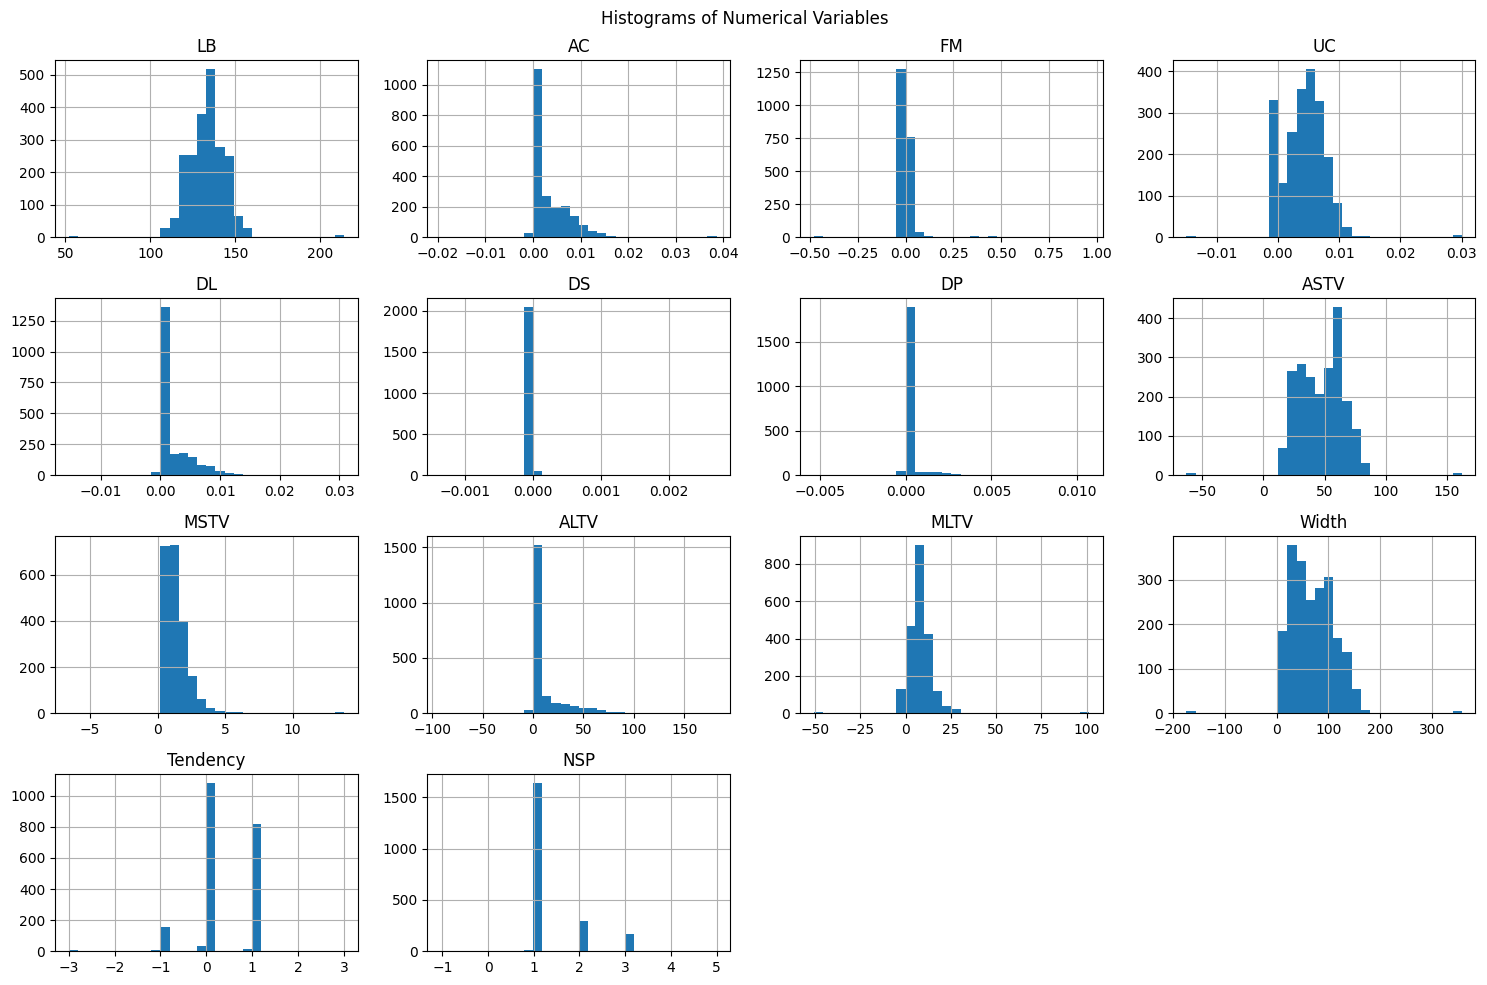

In [ ]:
import matplotlib.pyplot as plt
df.hist(figsize=(15, 10), bins=30)
plt.suptitle("Histograms of Numerical Variables")
plt.tight_layout()
plt.show()



*   Importing the matplotlib plotting library
*   Creating a histogram for each numeric column in the DataFrame

*   Adding a main title above all the histograms.

*   Adjusts  the spacing between plots so labels and titles don’t overlap
*   Displays all the histograms






**Boxplot**

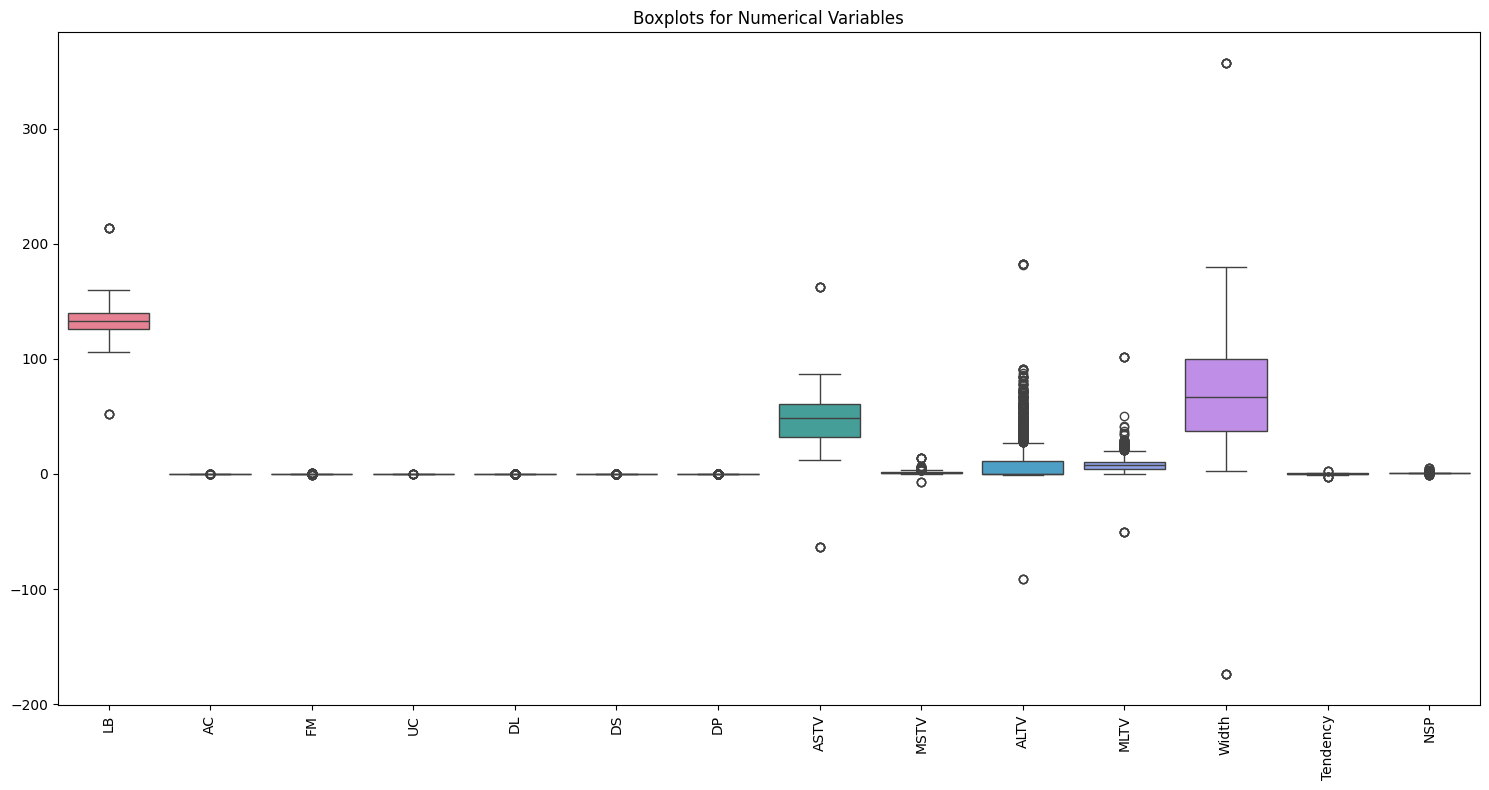

In [ ]:
import seaborn as sns
plt.figure(figsize=(15, 8))
sns.boxplot(data=df)
plt.title("Boxplots for Numerical Variables")
plt.xticks(rotation=90)
plt.tight_layout()
plt.show()


same operations of histogram are performed here.

But by using this:


*   Quick way to detect outliers

*   Shows how each column is distributed


*   Helps compare spread and symmetry between features




**Pie chart**

In [ ]:
plt.figure(figsize=(3, 3))
df['NSP'].value_counts().plot(
    kind='pie',
    autopct='%1.1f%%',
    startangle=90,
    colors=sns.color_palette('pastel')
)
plt.title('Pie Chart of NSP (Target Variable)')
plt.ylabel('')
plt.tight_layout()
plt.show()

Plots a pie chart of how many times each class (e.g., 1, 2, 3) appears in the NSP column:

value_counts() → counts how many records belong to each class.

kind='pie' → pie chart style.

autopct='%1.1f%%' → shows the percentage on each slice (e.g., 32.5%).

startangle=90 → starts pie chart from the top (for better readability).

colors=sns.color_palette('pastel') → uses soft colors for better visual appeal

**HeatMap**

In [ ]:
plt.figure(figsize=(12, 8))
correlation_matrix = df.corr()
sns.heatmap(correlation_matrix, annot=True, fmt=".2f", cmap='coolwarm', linewidths=0.5)
plt.title("Correlation Heatmap of Numeric Features")
plt.tight_layout()
plt.show()


**df.corr()** This function Computes the correlation matrix for all numeric columns in your DataFrame:

*  Values range from -1 to +1

* +1 = perfect positive correlation

* –1 = perfect negative correlation

* 0 = no correlation

**sns.heatmap()** This  function draws the heatmap using Seaborn:
* Dark red = strong positive correlation

* Dark blue = strong negative correlation

* Lighter colors = weak or no correlation




**pair plots**

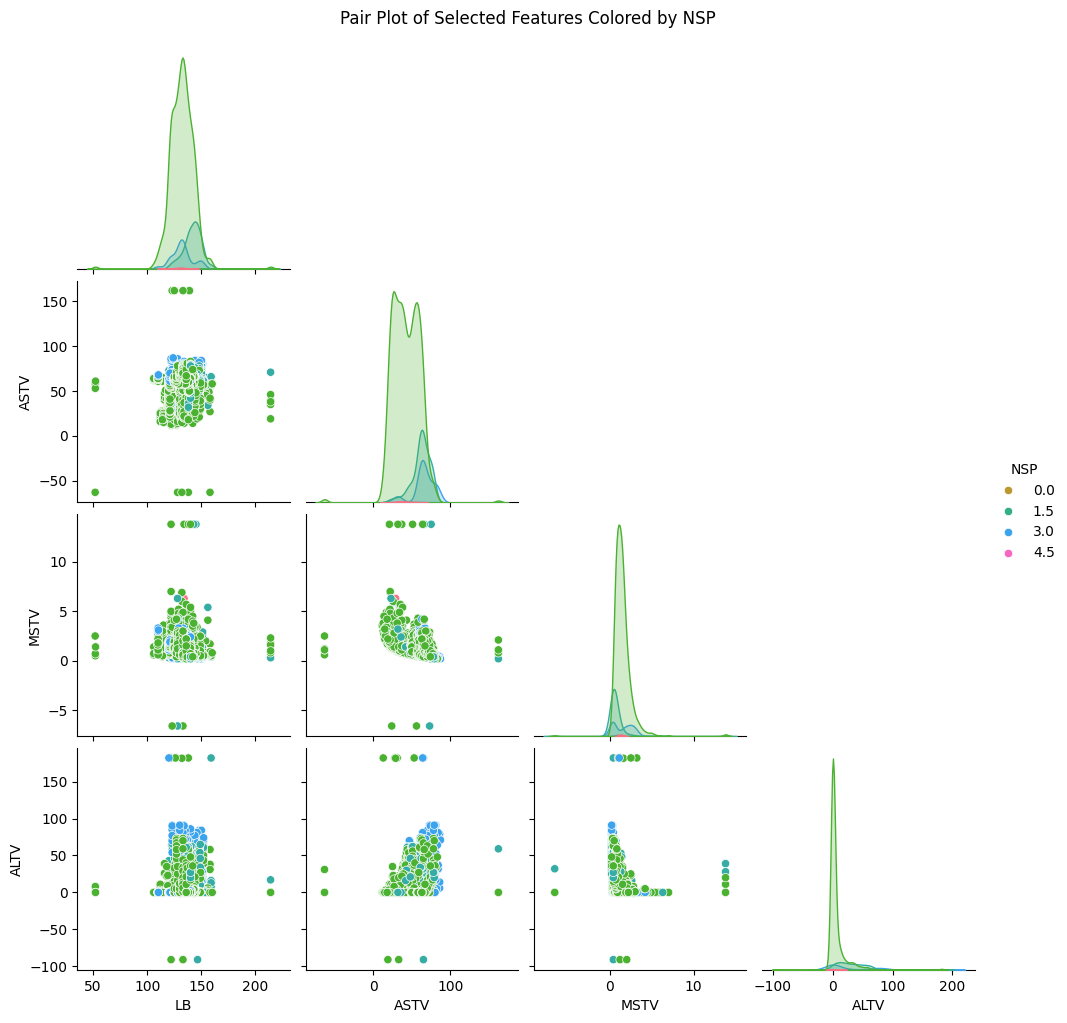

In [ ]:
selected_cols = ['LB', 'ASTV', 'MSTV', 'ALTV', 'NSP']
sns.pairplot(df[selected_cols], hue='NSP', corner=True, palette='husl')
plt.suptitle("Pair Plot of Selected Features Colored by NSP", y=1.02)
plt.show()

1. we are  choosing 5 specific columns from your DataFrame to include in the plot.

   * LB, ASTV, MSTV, ALTV → numeric features

   * NSP → target class (used for coloring the points)
2. Creates a grid of scatter plots showing relationships between each pair of selected variables.

  * hue='NSP' → points are colored by class label (NSP).

  * corner=True → only shows the lower triangle of plots to reduce clutter.

  * palette='husl' → uses a colorful palette for better visibility.


4.	Pattern Recognition and Insights:

In [ ]:
strong_corr = correlation_matrix[
    ((correlation_matrix >= 0.7) | (correlation_matrix <= -0.7)) &
    (correlation_matrix != 1.0)
]

Filters the correlation matrix to keep only values:

 * Greater than are equal to 0.7 (strong positive)

 * Less than are equal to  -0.7 (strong negative)

 * Not equal to  1.0 (to ignore perfect self-correlation)

In [ ]:
# Convert to tidy format
pairs = strong_corr.stack().reset_index()
pairs.columns = ['Feature 1', 'Feature 2', 'Correlation']
pairs = pairs.sort_values(by='Correlation', ascending=False)

print(pairs)

Empty DataFrame
Columns: [Feature 1, Feature 2, Correlation]
Index: []


1. Convert matrix to a tidy DataFrame
  * "Stacks" the matrix into a long format (row-by-row),

  * reset_index() turns the multi-index into a clean table.
2. Rename the column, because it is easier to read the data.
3. Sort by strength of correlation,it means the strongest correlations appear at the top of the table.

By this we can quickly identify strongly related variable pairs.And it is also useful for the feature selection and insight generation.It helps to detect multicollinearity.



**Trends Analysis**

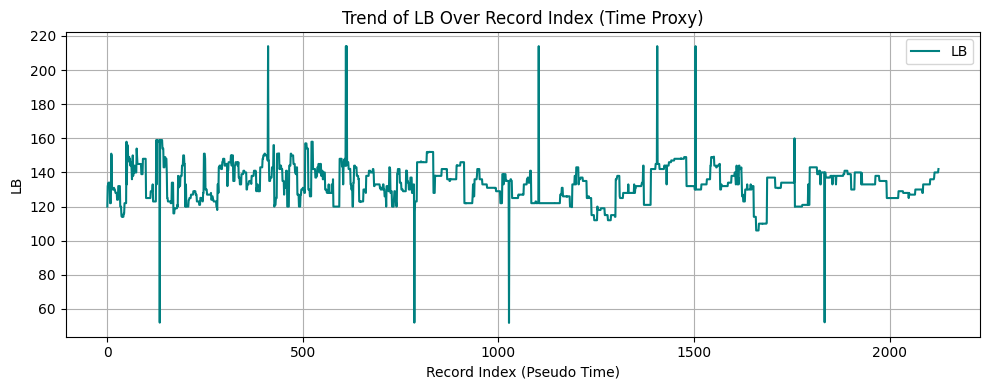

In [ ]:
df.reset_index(inplace=True)
columns_to_plot = ['LB', 'ASTV', 'MSTV']
for col in columns_to_plot:
    plt.figure(figsize=(10, 4))
    plt.plot(df['index'], df[col], label=col, color='teal')
    plt.title(f"Trend of {col} Over Record Index (Time Proxy)")
    plt.xlabel("Record Index (Pseudo Time)")
    plt.ylabel(col)
    plt.grid(True)
    plt.legend()
    plt.tight_layout()
    plt.show()

**Steps:**

 1. "Adding a new column called 'index' to use as a pseudo-time axis, since the dataset doesn't have a real timestamp column."
 2. Chooses the columns  want to track over time for selected features to analyze.
 3. Loops through each feature (LB, ASTV, MSTV) and makes a separate plot.
 4. Inside the loop draws a line plot of how the values change from the first row to the last
 5. Adds chart title, axis labels, and formatting.plt.show() displays the plot.

 Conclusion

This exploratory data analysis revealed several important characteristics of the Cardiotocographic dataset:

*   **Data Quality:** Missing values and duplicates were identified and addressed, ensuring a clean dataset for analysis.
*   **Data Distribution and Outliers:** Histograms and boxplots highlighted the distributions of features and the presence of outliers, particularly in 'FM', 'DS', 'DP', 'ALTV', and 'NSP'. These outliers require careful consideration in subsequent modeling steps.
*   **Statistical Insights:** The statistical summary provided key measures of central tendency and spread for each feature, offering a quick overview of the data's characteristics.
*   **Relationships between Features:** The heatmap showed correlations between features, which can inform feature selection and understanding the interplay between different physiological parameters. The pair plot further illustrated relationships between selected features and their association with the target variable 'NSP'.
*   **Trends:** A basic trend analysis using the record index as a proxy for time suggested potential temporal patterns in some features.

**Implications for Further Analysis:**

The findings suggest that future steps should consider:

*   Strategies for handling the identified outliers.
*   Addressing the class imbalance in the target variable 'NSP'.
*   Leveraging the correlation analysis for potential feature selection.
*   Exploring temporal aspects of the data more rigorously if actual time information is available.

In essence, this analysis provides a solid foundation for building predictive models, emphasizing the need to address data quality issues, outlier treatment, and class imbalance for reliable results.